In [1]:
import pandas as pd
import numpy as np

In [2]:
edu = pd.read_csv(r"C:\Users\DELL\Desktop\Logistic Regression using Python\xAPI-Edu-Data.csv")

In [3]:
edu.shape

(480, 17)

In [5]:
#edu.info()

In [4]:
edu.columns[edu.dtypes=='object']

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

# Q. 1 

In [6]:
categorical_features = edu.dtypes[edu.dtypes=='object'].index
print("Number of Categorical Features" , len(categorical_features))
print(categorical_features)

Number of Categorical Features 13
Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')


AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  gender


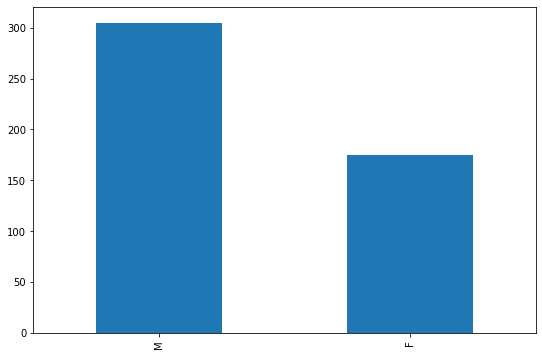

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  NationalITy


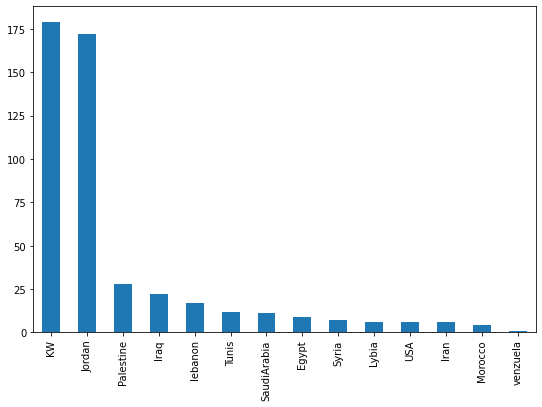

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  PlaceofBirth


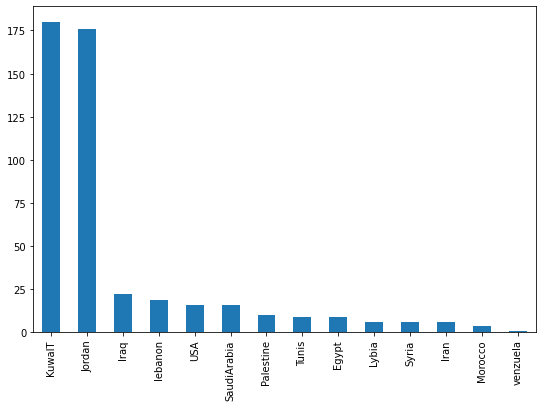

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  StageID


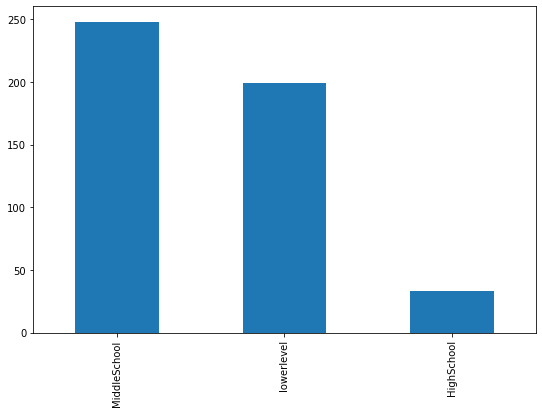

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  GradeID


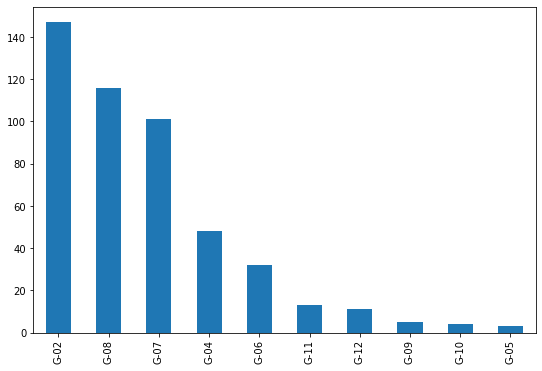

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  SectionID


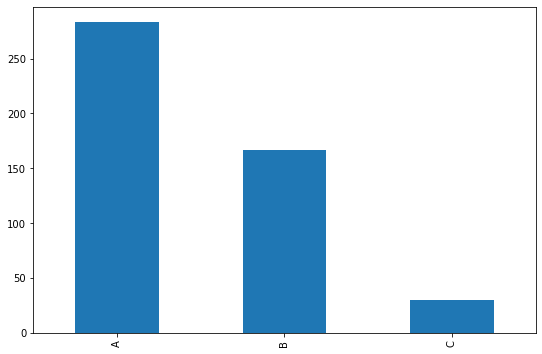

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  Topic


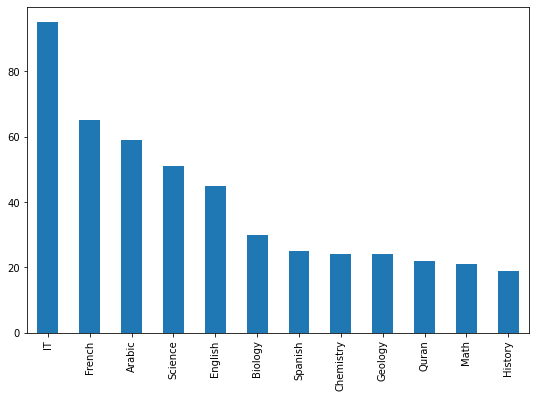

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  Semester


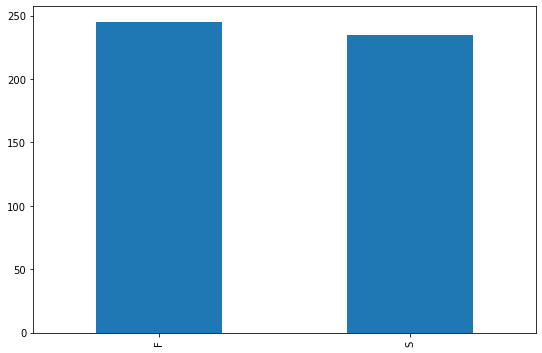

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  Relation


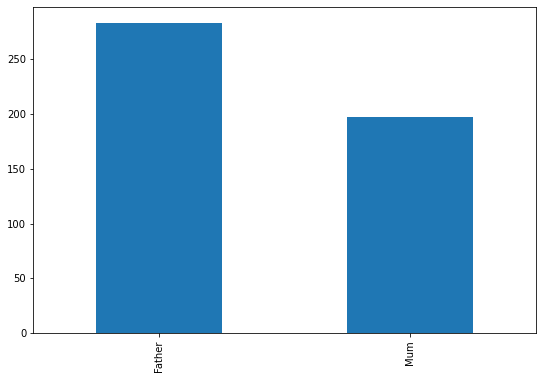

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  ParentAnsweringSurvey


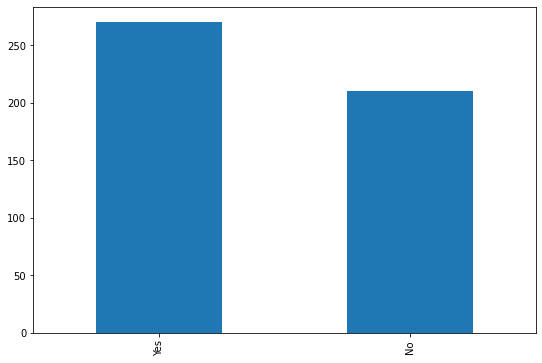

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  ParentschoolSatisfaction


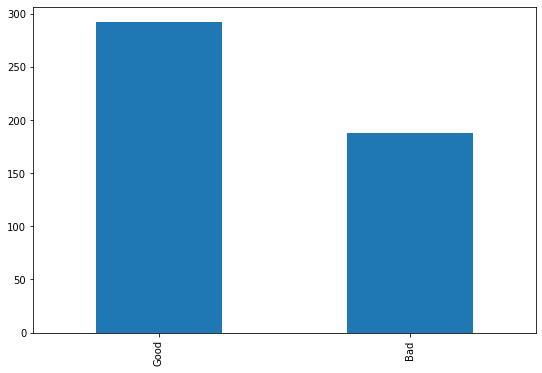

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  StudentAbsenceDays


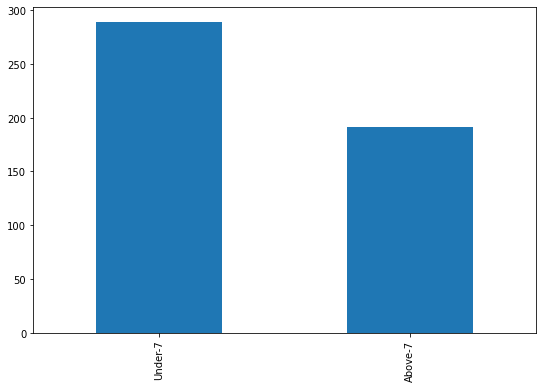

AxesSubplot(0.125,0.125;0.775x0.755)
Column Name --->  Class


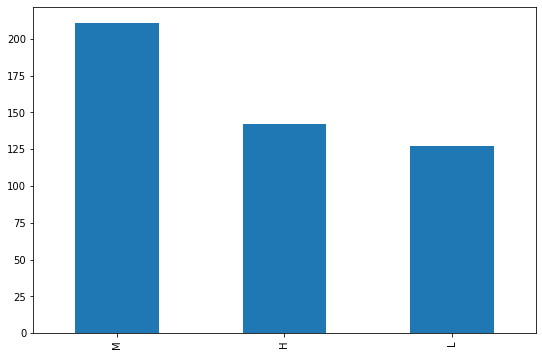

In [10]:
import matplotlib.pyplot as plt
for i in categorical_features:
    print(edu[i].sort_values().value_counts().plot(kind='bar',figsize=(9, 6)))
    print( "Column Name ---> ",i)
    
    plt.show()       


# Q.2 Look at some categorical features in relation to each other, to see what insights could be possibly read?

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='count'>

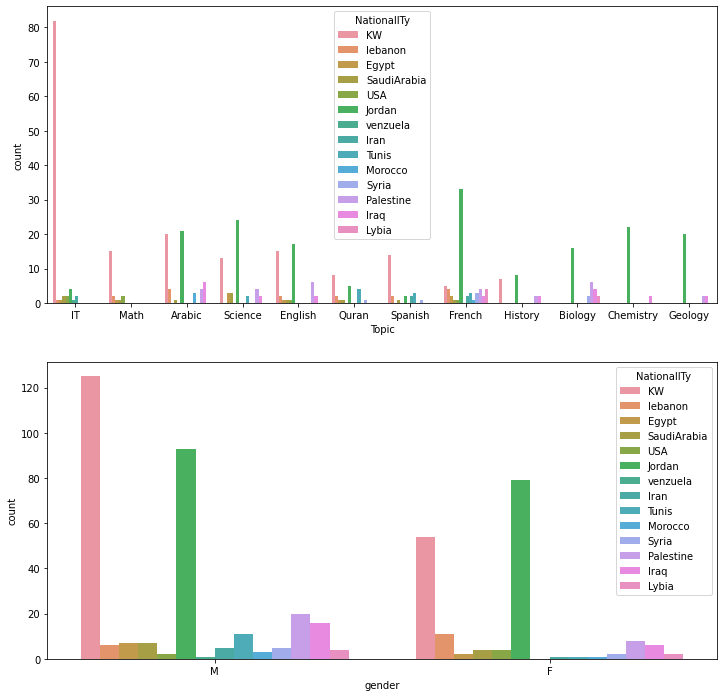

In [12]:
#comparing topic and NationalITy
fig, (A, B)  = plt.subplots(2, 1,figsize=(12,12))
sns.countplot(x='Topic', hue='NationalITy', data=edu ,ax=A )
sns.countplot(x='gender', hue='NationalITy', data=edu ,ax=B)

comparing nationality with topic more people from KW  are in IT sector.
comparing gender with nationality max male and female are from KW.

<AxesSubplot:xlabel='gender', ylabel='count'>

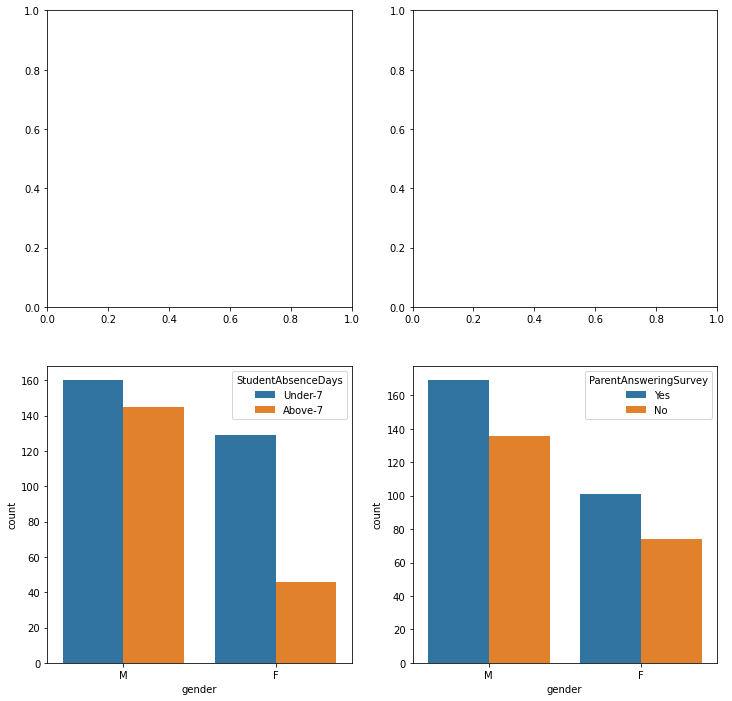

In [13]:
fig, axis  = plt.subplots(2,2,figsize=(12,12))
sns.countplot(x='gender', hue='StudentAbsenceDays', data=edu, ax=axis[1,0])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=edu, ax=axis[1,1])

# Q. 3 Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

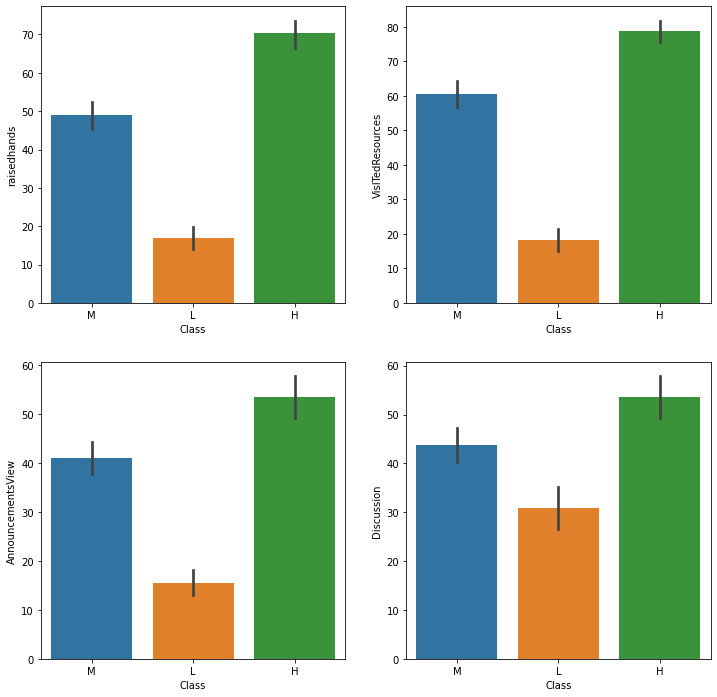

In [16]:
fig, axis  = plt.subplots(2,2,figsize=(12,12))
sns.barplot(x='Class', y='AnnouncementsView', data=edu, ax=axis[1,0])
sns.barplot(x='Class', y='Discussion', data=edu, ax=axis[1,1])
sns.barplot(x='Class', y='raisedhands', data=edu, ax=axis[0,0])
sns.barplot(x='Class', y='VisITedResources', data=edu, ax=axis[0,1])


The students comes in Higher class are very good attendive to Raisehand. 
Discussion, Announcements veiwed and visiting rescources in school Medium class studens are in Mid range in all 4 parametors Lower class student has Low  range in AnnouncementsView and  VisITedResources .

# Q .4 From the above result, what are the factors that leads to get low grades of the students?

Form the above Result We visualize that the students comes in Lower class are very bad , not attendive to Raisehand and  Discussion, [Lowerr counts in Discussion, raisedhands, AnnouncementViews,VisITedResources], performed worse for the Students in Lower Grade.


# Q. 5 Build classification model and present it's classification report?

In [17]:
edu.gender.replace({'M':1,'F':0},inplace = True)
edu.ParentAnsweringSurvey.replace({'Yes':1,'No':0},inplace = True)
edu.ParentschoolSatisfaction.replace({'Good':1,'Bad':0},inplace = True)
edu.Class.replace({'L':0,'M':1 , 'H':2},inplace = True)
edu.StudentAbsenceDays.replace({'Above-7':1,'Under-7':0},inplace = True)
edu.StageID.replace({'lowerlevel':0,'MiddleSchool':1 , 'HighSchool':2},inplace = True)

In [18]:
from sklearn.preprocessing import LabelEncoder         
le= LabelEncoder()


edu.NationalITy = le.fit_transform(edu.NationalITy)
edu.PlaceofBirth = le.fit_transform(edu.PlaceofBirth)
edu.GradeID = le.fit_transform(edu.GradeID)
edu.SectionID = le.fit_transform(edu.SectionID)
edu.Topic = le.fit_transform(edu.Topic)
edu.Semester = le.fit_transform(edu.Semester)
edu.Relation = le.fit_transform(edu.Relation)

In [19]:
from sklearn.model_selection import train_test_split

edu_train , edu_test = train_test_split( edu , test_size=0.2 , random_state=0)

In [20]:
edu_train_x = edu_train.iloc[:,0:-1]
edu_train_y = edu_train.iloc[:,-1]

edu_test_X = edu_test.iloc[:,0:-1]
edu_test_y = edu_test.iloc[:,-1]

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [22]:
logreg.fit(edu_train_x , edu_train_y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred_edu = logreg.predict(edu_test_X)
pred_edu

array([1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 2,
       1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix

tab1= confusion_matrix(pred_edu ,edu_test_y)
tab1

array([[22,  4,  0],
       [ 1, 33, 13],
       [ 0,  8, 15]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_edu, edu_test_y)

0.7291666666666666

In [29]:
from sklearn.metrics import classification_report

print(classification_report(pred_edu, edu_test_y))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.73      0.70      0.72        47
           2       0.54      0.65      0.59        23

    accuracy                           0.73        96
   macro avg       0.74      0.73      0.73        96
weighted avg       0.75      0.73      0.74        96



In [32]:
pred_report = logreg.predict_proba(edu.iloc[:, 0:-1]) 
pred_report = pd.DataFrame(pred_p)
pred_report.rename(columns={0: 'Prob_Lower', 1: 'Prob_Middle', 2: 'Prob_High'}, inplace=True)
pred_report.sort_values('Prob_High' , ascending = False)

,Prob_Lower,Prob_Middle,Prob_High
328,0.000114,0.048049,0.951837
404,0.000108,0.057811,0.942081
329,0.000154,0.062048,0.937798
274,0.000121,0.064277,0.935602
314,0.000042,0.070461,0.929497
...,...,...,...
64,0.901050,0.098197,0.000753
231,0.932910,0.066372,0.000718
85,0.938590,0.060715,0.000695
38,0.935582,0.063752,0.000666
